In [7]:
# %pip install numpy
# %pip install matplotlib
# %pip install seaborn
%pip install pandas
%pip install seaborn
%pip install plotly


[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
  Obtaining dependency information for plotly from https://files.pythonhosted.org/packages/b8/f0/bcf716a8e070370d6598c92fcd328bd9ef8a9bda2c5562da5a835c66700b/plotly-5.23.0-py3-none-any.whl.metadata
  Obtaining dependency information for tenacity>=6.2.0 from https://files.pythonhosted.org/packages/b6/cb/b86984bed139586d01532a587464b5805f12e397594f19f931c4c2fbfa61/tenacity-9.0.0-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 8.9 MB/s eta 0:00:00:00:0100:01

[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel

clean
augment
get image conversion ratio
area of pothole
convert area to true area
stick to pothole ratio
aspect ratio of pothole shape

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [ ]:
# Replace 'test_labels.csv' with the actual path to your file
data = pd.read_csv('patch/train_labels.csv')

data.rename(columns={'Bags used ': 'bags'}, inplace=True)
data.rename(columns={'Pothole number': 'p'}, inplace=True)

# Basic information about the dataset
print(data.head())

Add costing for asphalt
add research about types of potholes and standards
add early comparison of
hash the images and find identicals like 1430 and 1431

Pothole number,Bags used 
103,0.5
104,0.5
105,0.5
108,0.25 - 0.5
114,2 - 1 (1)
143,0.5 - 1 (3)
144,0.5 - 2 (2)
406,2 - 2.5 (1)
434,1 - 0.5 (2)
450,1 - 0.5 (1)
470,0.5
473,0.5
479,0.25 - 0.5 (3)
1040,0.5 
1086,1 - 0.5 (3)
1115,0.5
1134,0.25
1161,0.25
1162,0.25
1181,1
1198,0.25 - 0.5 (2)
1205,0.5
1250,0.25 - 0.5 (1)
1270,0.5
1278,0.25
1280,0.25
1296,0.5
1409,0.25
1430,0.5
1438,0.5



In [15]:
# Check for missing values
print(data.isnull().sum())

# Interactive Histogram of 'bags'
fig_hist = px.histogram(data, x='bags', nbins=20, title='Distribution of bags')
fig_hist.show()

# Interactive Scatter plot of 'p' vs 'bags'
fig_scatter = px.scatter(data, x='p', y='bags', opacity=0.3, title='p vs bags')
fig_scatter.show()

# Interactive Box plot of 'bags'
fig_box = go.Figure()
fig_box.add_trace(go.Box(y=data['bags'], name='bags'))
fig_box.update_layout(title='Box Plot of bags')
fig_box.show()

p       0
bags    0
dtype: int64


     p  bags
0  101   0.5
1  102   1.0
2  106   0.5
3  107   0.5
4  109   0.5
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 644 entries, 0 to 643
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   p       644 non-null    int64  
 1   bags    644 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 10.2 KB
None
                 p        bags
count   644.000000  644.000000
mean    828.375776    0.865140
std     466.929338    1.121281
min     101.000000    0.250000
25%     327.750000    0.500000
50%    1057.500000    0.500000
75%    1231.250000    1.000000
max    1450.000000   15.000000
p       0
bags    0
dtype: int64


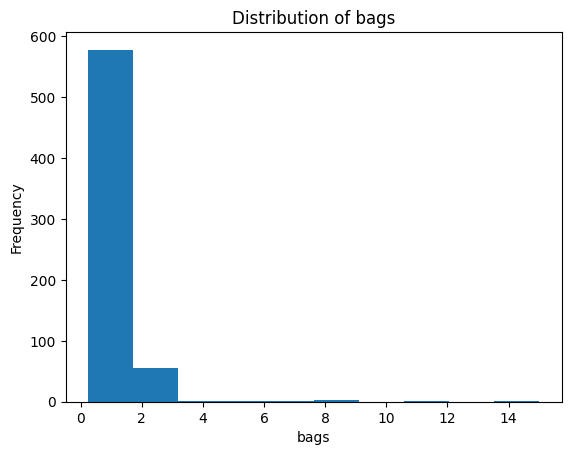

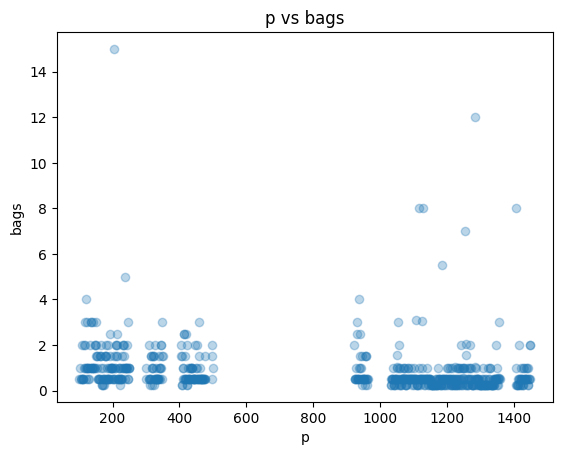

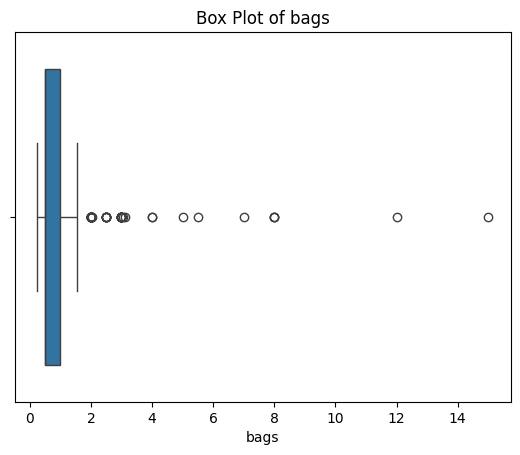

In [14]:

print(data.info())
print(data.describe())

# Check for missing values
print(data.isnull().sum())

# Visualizations
# Histogram of 'bags'
plt.hist(data['bags'], bins=10)
plt.xlabel('bags')
plt.ylabel('Frequency')
plt.title('Distribution of bags')
plt.show()

# Scatter plot of 'p' vs 'bags'
plt.scatter(data['p'], data['bags'], alpha=.3)
plt.xlabel('p')
plt.ylabel('bags')
plt.title('p vs bags')
plt.show()

# Box plot of 'bags'
sns.boxplot(x=data['bags'])
plt.title('Box Plot of bags')
plt.show()

In [ ]:
image_path = "C:/Users/23742429/Desktop/segment-anything-main/data/train_images/train_images/p101.jpg"

In [ ]:
import cv2
import numpy as np

def segment_red_patches(image_path):
  """
  Segments red patches in an image.

  Args:
    image_path: Path to the image file.

  Returns:
    A binary mask where red patches are marked as 1.
  """

  # Load the image
  img = cv2.imread(image_path)

  # Convert to HSV color space
  hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

  # Define lower and upper bounds for red color in HSV
  lower_red = np.array([0, 120, 70])
  upper_red = np.array([10, 255, 255])

  # Create a mask for red color
  mask = cv2.inRange(hsv, lower_red, upper_red)

  # Apply morphological operations to refine the mask (optional)
  kernel = np.ones((5, 5), np.uint8)
  mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)
  mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)

  return mask

# Example usage
mask = segment_red_patches(image_path)

# Display the mask
cv2.imshow("Red Mask", mask)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
import cv2
import numpy as np

def segment_and_find_centroids(image_path):
  """
  Segments red patches in an image and finds their centroids.

  Args:
    image_path: Path to the image file.

  Returns:
    A tuple of (centroids, mask, img) where:
      - centroids: A list of (x, y) coordinates of the centroids.
      - mask: The binary mask of red patches.
      - img: The original image.
  """

  # Load the image
  img = cv2.imread(image_path)

  # Convert to HSV color space
  hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

  # Define lower and upper bounds for red color in HSV
  lower_red = np.array([0, 120, 70])
  upper_red = np.array([10, 255, 255])

  # Create a mask for red color
  mask = cv2.inRange(hsv, lower_red, upper_red)

  # Apply morphological operations to refine the mask (optional)
  kernel = np.ones((5, 5), np.uint8)
  mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)
  mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)

  # Find contours
  contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

  # Find centroids
  centroids = []
  for cnt in contours:
    M = cv2.moments(cnt)
    if M["m00"] != 0:
      cx = int(M["m10"] / M["m00"])
      cy = int(M["m01"] / M["m00"])
      centroids.append((cx, cy))

  return centroids, mask, img

def visualize_centroids(centroids, mask, img):
  """
  Visualizes the centroids on the original image.

  Args:
    centroids: A list of (x, y) coordinates of the centroids.
    mask: The binary mask of red patches.
    img: The original image.
  """

  # Draw centroids on the image
  for cx, cy in centroids:
    cv2.circle(img, (cx, cy), 5, (0, 255, 0), -1)

  # Display the image with centroids
  cv2.imshow("Image with Centroids", img)
  cv2.waitKey(0)
  cv2.destroyAllWindows()

def calculate_euclidean_distance(centroids):
  """
  Calculates the Euclidean distance between centroids.

  Args:
    centroids: A list of (x, y) coordinates of the centroids.

  Returns:
    A list of Euclidean distances between all pairs of centroids.
  """

  import math

  distances = []
  for i in range(len(centroids)):
    for j in range(i + 1, len(centroids)):
      x1, y1 = centroids[i]
      x2, y2 = centroids[j]
      distance = math.sqrt((x2 - x1)**2 + (y2 - y1)**2)
      distances.append(distance)
  return distances

# Example usage
centroids, mask, img = segment_and_find_centroids(image_path)
visualize_centroids(centroids, mask, img)

In [ ]:
import cv2
import numpy as np

def segment_and_find_centroids(image_path):
  """
  Segments red patches in an image and finds their centroids.

  Args:
    image_path: Path to the image file.

  Returns:
    A tuple of (centroids, mask, img) where:
      - centroids: A list of (x, y) coordinates of the centroids.
      - mask: The binary mask of red patches.
      - img: The original image.
  """

  # Load the image
  img = cv2.imread(image_path)

  # Convert to HSV color space
  hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

  # Define lower and upper bounds for red color in HSV
  lower_red = np.array([0, 120, 70])
  upper_red = np.array([10, 255, 255])

  # Create a mask for red color
  mask = cv2.inRange(hsv, lower_red, upper_red)

  # Apply morphological operations to refine the mask (optional)
  kernel = np.ones((5, 5), np.uint8)
  mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)
  mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)

  # Find contours
  contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

  # Find centroids
  centroids = []
  for cnt in contours:
    M = cv2.moments(cnt)
    if M["m00"] != 0:
      cx = int(M["m10"] / M["m00"])
      cy = int(M["m01"] / M["m00"])
      centroids.append((cx, cy))

  return centroids, mask, img

def visualize_centroids(centroids, mask, img):
  """
  Visualizes the centroids on the original image.

  Args:
    centroids: A list of (x, y) coordinates of the centroids.
    mask: The binary mask of red patches.
    img: The original image.
  """

  # Draw centroids on the image
  for cx, cy in centroids:
    cv2.circle(img, (cx, cy), 5, (0, 255, 0), -1)

  # Display the image with centroids
  cv2.imshow("Image with Centroids", img)
  cv2.waitKey(0)
  cv2.destroyAllWindows()

def calculate_euclidean_distance(centroids):
  """
  Calculates the Euclidean distance between centroids.

  Args:
    centroids: A list of (x, y) coordinates of the centroids.

  Returns:
    A list of Euclidean distances between all pairs of centroids.
  """

  import math

  distances = []
  for i in range(len(centroids)):
    for j in range(i + 1, len(centroids)):
      x1, y1 = centroids[i]
      x2, y2 = centroids[j]
      distance = math.sqrt((x2 - x1)**2 + (y2 - y1)**2)
      distances.append(distance)
  return distances

# Example usage
# image_path = "your_image.jpg"
centroids, mask, img = segment_and_find_centroids(image_path)
visualize_centroids(centroids, mask, img)

distances = calculate_euclidean_distance(centroids)
print("Euclidean distances between centroids (in pixels):", distances)

Euclidean distances between centroids (in pixels): [261.6906570743404]


In [ ]:
import cv2
import numpy as np
import os

def segment_and_find_centroids(image_path):
  """
  Segments red patches in an image and finds their centroids.

  Args:
    image_path: Path to the image file.

  Returns:
    A tuple of (centroids, mask, img) where:
      - centroids: A list of (x, y) coordinates of the centroids.
      - mask: The binary mask of red patches.
      - img: The original image.
  """

  # Load the image
  img = cv2.imread(image_path)

  # Convert to HSV color space
  hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

  # Define lower and upper bounds for red color in HSV
  lower_red = np.array([0, 120, 70])
  upper_red = np.array([10, 255, 255])

  # Create a mask for red color
  mask = cv2.inRange(hsv, lower_red, upper_red)

  # Apply morphological operations to refine the mask (optional)
  kernel = np.ones((5, 5), np.uint8)
  mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)
  mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)

  # Find contours
  contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

  # Find centroids
  centroids = []
  for cnt in contours:
    M = cv2.moments(cnt)
    if M["m00"] != 0:
      cx = int(M["m10"] / M["m00"])
      cy = int(M["m01"] / M["m00"])
      centroids.append((cx, cy))

  return centroids, mask, img

def visualize_centroids(centroids, mask, img, output_path):
  """
  Visualizes the centroids on the original image and saves it as a new image.

  Args:
    centroids: A list of (x, y) coordinates of the centroids.
    mask: The binary mask of red patches.
    img: The original image.
    output_path: The path to save the output image.
  """

  # Draw centroids on the image
  for cx, cy in centroids:
    cv2.circle(img, (cx, cy), 5, (0, 255, 0), -1)

  # Save the image with centroids
  cv2.imwrite(output_path, img)

def calculate_euclidean_distance(centroids, output_file):
  """
  Calculates the Euclidean distance between centroids and writes it to a text file.

  Args:
    centroids: A list of (x, y) coordinates of the centroids.
    output_file: The path to save the output text file.
  """

  import math

  distances = []
  for i in range(len(centroids)):
    for j in range(i + 1, len(centroids)):
      x1, y1 = centroids[i]
      x2, y2 = centroids[j]
      distance = math.sqrt((x2 - x1)**2 + (y2 - y1)**2)
      distances.append(distance)

  with open(output_file, "w") as f:
    f.write(f"Filename: {os.path.basename(image_path)}\n")
    f.write(f"Centroids: {centroids}\n")
    f.write(f"Euclidean distances (pixels): {distances}\n")

# Example usage
output_image_path = f"2c_{os.path.basename(image_path)}"
output_text_file = f"2c_{os.path.basename(image_path)}.txt"

centroids, mask, img = segment_and_find_centroids(image_path)
visualize_centroids(centroids, mask, img, output_image_path)
calculate_euclidean_distance(centroids, output_text_file)

error: OpenCV(4.10.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:196: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'
